In [33]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.10.0'

# XOR Problem

* XOR 로 표시되는 정보를 구분해보자

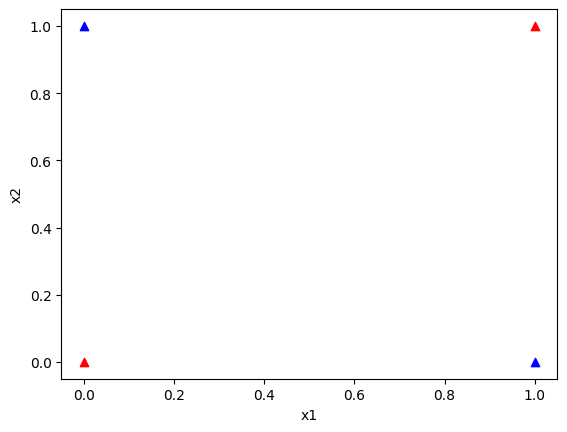

In [34]:
x_data = [[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]]
y_data = [[0.],
          [1.],
          [1.],
          [0.]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Dataset 준비



In [35]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

# Multi-layer perceptron

In [36]:
W1 = tf.Variable(tf.random.normal([2, 1]), name='weight1')
b1 = tf.Variable(tf.random.normal([1]), name='bias1')

W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

W3 = tf.Variable(tf.random.normal([2, 1]), name='weight3')
b3 = tf.Variable(tf.random.normal([1]), name='bias3')

## Layers 구성

In [37]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1) # 신경망 1층 하고 시그모이드로 활성화
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    
    return hypothesis

## Loss Function

In [38]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)

In [39]:
def grad(hypothesis, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

## Training


In [40]:
EPOCHS = 10000

for step in range(EPOCHS+1):
    for features, labels  in dataset:
        grads = grad(neural_net(features), labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 1000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))


Iter: 0, Loss: 0.9383
Iter: 1000, Loss: 0.5993
Iter: 2000, Loss: 0.4792
Iter: 3000, Loss: 0.4092
Iter: 4000, Loss: 0.3819
Iter: 5000, Loss: 0.3700
Iter: 6000, Loss: 0.3638
Iter: 7000, Loss: 0.3601
Iter: 8000, Loss: 0.3576
Iter: 9000, Loss: 0.3559
Iter: 10000, Loss: 0.3546


In [41]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [42]:
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Testset Accuracy: 0.5000


###with Tensorflow

In [43]:
model = Sequential([
    layers.Dense(2, activation='sigmoid'), # 웨이트가 내부적으로 알아서 최적화해서 glorot_uniform
    layers.Dense(1, activation='sigmoid')
])

In [44]:
def loss_fn(model, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(model) + (1 - labels) * tf.math.log(1 - model))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.1)

In [45]:
def grad(hypothesis, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(model(features),labels)
    return tape.gradient(loss_value, model.trainable_variables)

In [46]:
EPOCHS = 10000

for step in range(EPOCHS+1):
    for features, labels  in dataset:
        grads = grad(model(features), labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads, model.trainable_variables))
        if step % 1000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(model(features),labels)))   

Iter: 0, Loss: 0.7172
Iter: 1000, Loss: 0.6914
Iter: 2000, Loss: 0.6757
Iter: 3000, Loss: 0.5587
Iter: 4000, Loss: 0.1878
Iter: 5000, Loss: 0.0747
Iter: 6000, Loss: 0.0442
Iter: 7000, Loss: 0.0310
Iter: 8000, Loss: 0.0237
Iter: 9000, Loss: 0.0191
Iter: 10000, Loss: 0.0160


In [47]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [48]:
for features, labels  in dataset:
    print("Test Data")
    print(features.numpy())
    print("Label")
    print(labels.numpy())
    pred = model(features)
    print("Pred : ")
    print(pred.numpy())
    test_acc = accuracy_fn(pred, labels)
    print("Testset Accuracy: {:.4f}".format(test_acc))

Test Data
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Label
[[0.]
 [1.]
 [1.]
 [0.]]
Pred : 
[[0.01551443]
 [0.97973925]
 [0.9854834 ]
 [0.01315045]]
Testset Accuracy: 1.0000
